# Initialisierung

In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [8]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
pcb = pd.read_csv(DATASET_DIR / "POS_CASH_balance.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [5]:
description.loc[description['Table']=="POS_CASH_balance.csv", "Row":"Special"]

Row  \
145            SK_ID_PREV    
146             SK_ID_CURR   
147         MONTHS_BALANCE   
148         CNT_INSTALMENT   
149  CNT_INSTALMENT_FUTURE   
150   NAME_CONTRACT_STATUS   
151                 SK_DPD   
152             SK_DPD_DEF   

                                                                                                                                                                                                                                                        Description  \
145                                                                                                               ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)   
146                                                                                                                                                                                                                                        ID of loan in our sample   
147  Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )   
148                                                                                                                                                                                                                  Term of previous credit (can change over time)   
149                                                                                                                                                                                                                 Installments left to pay on the previous credit   
150                                                                                                                                                                                                                                Contract status during the month   
151                                                                                                                                                                                                         DPD (days past due) during the month of previous credit   
152                                                                                                                                                            DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit   

                                   Special  
145                                    NaN  
146                                    NaN  
147  time only relative to the application  
148                                    NaN  
149                                    NaN  
150                                    NaN  
151                                    NaN  
152                                    NaN

In [29]:
# Function to draw a Piechart
def draw_piechart(arguments):
    
    fig, ax = plt.subplots(1,len(arguments))

    try:
    # Handle multiple plots
        for argument, a in zip(arguments,ax):
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]

            a.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False, labeldistance=1.05)
            a.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            a.set_title(title)
            
    # Handle single plot           
    except TypeError:
        for argument in arguments:
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]
        
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False)
            ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(title)
    plt.show()

# Datenaufbereitung

In [9]:
# Schnittmenge zwischen app_train und bureau
# Ergänzt die Variable "TARGET" in dem bureau-Datensatz
pcb = pd.merge(pcb, app_train[["SK_ID_CURR","TARGET"]] ,on="SK_ID_CURR")

# Austausch der numerischen Kategorien durch sprechende, interpretierbare Variablen
pcb["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

# Unterteilung des Datensatzen nach Payback und Default
payback = pcb[pcb["TARGET"] == "Payback"]
default = pcb[pcb["TARGET"] == "Default"]

In [30]:
pcb.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1803195      182943             -17            48.0   
2     1803195      182943             -21            48.0   
3     1803195      182943              -8            48.0   
4     1803195      182943              -4            48.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF   TARGET  
0                   45.0               Active       0           0  Payback  
1                   31.0               Active       0           0  Payback  
2                   35.0               Active       0           0  Payback  
3                   21.0               Active       0           0  Payback  
4                   17.0               Active       0           0  Payback

# Datenanalyse

## Laufzeit vergangener Kredite

In [31]:
display(Markdown("### Payback"))
print(payback["CNT_INSTALMENT"].mean(), "\n")

display(Markdown("### Default"))
print(default["CNT_INSTALMENT"].mean())

### Payback

16.970900159163502 



### Default

17.822109352802777


## Vertragsstatus

### Payback

Active                   7244509
Completed                 587920
Signed                     68788
Demand                      5299
Returned to the store       4119
Approved                    3902
Amortized debt               240
Canceled                      10
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64 



### Default

Active                   574068
Completed                 46952
Signed                     5837
Demand                      811
Returned to the store       472
Approved                    319
Amortized debt              125
Canceled                      2
Name: NAME_CONTRACT_STATUS, dtype: int64 



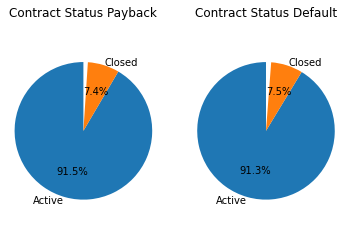

In [35]:
COLUMN_NAME = "NAME_CONTRACT_STATUS"
TITLE = "Contract Status"
LABELS = ["Active", "Closed"]
SIZES_PER = lambda x : x / N

count = payback[COLUMN_NAME].value_counts()

N = len(payback[COLUMN_NAME])

a = count["Active"]
b = count["Completed"]
SIZES = [a,b]

labels1 = LABELS
sizes1 = [SIZES_PER(element) for element in SIZES]
title1 = TITLE + " Payback"

display(Markdown("### Payback"))
print(count, "\n")

count = default[COLUMN_NAME].value_counts()

N = len(default[COLUMN_NAME])

a = count["Active"]
b = count["Completed"]
SIZES = [a,b]

labels2 = LABELS
sizes2 = [SIZES_PER(element) for element in SIZES]
title2 = TITLE + " Default"

display(Markdown("### Default"))
print(count, "\n")

arguments = [(labels1, sizes1, title1), (labels2, sizes2, title2)]

draw_piechart(arguments)

## Default vergangener Kredite

In [45]:
display(Markdown("### Payback"))
print(len(payback[payback["SK_DPD"] > 0]["SK_DPD"])/len(payback["SK_DPD"])*100, "\n")

display(Markdown("### Default"))
print(len(default[default["SK_DPD"] > 0]["SK_DPD"])/len(default["SK_DPD"])*100)

### Payback

2.9484298317996855 



### Default

4.095700508760934


2,95 % der in Application Train zurückzahlenden Kunden haben bereits zuvor einmal einen Kredit überzogen.

4,1 % der in Application Train ausgefallenen Kunden haben bereits zuvor einmal einen Kredit überzogen.